## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [6]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500
model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.8563 - acc: 0.3346 - val_loss: 1.7357 - val_acc: 0.3653
Epoch 2/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.6375 - acc: 0.4224 - val_loss: 1.6669 - val_acc: 0.3991
Epoch 3/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.5508 - acc: 0.4513 - val_loss: 1.5816 - val_acc: 0.4360
Epoch 4/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.4874 - acc: 0.4733 - val_loss: 1.5620 - val_acc: 0.4439
Epoch 5/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4401 - acc: 0.4886 - val_loss: 1.5607 - val_acc: 0.4446
Epoch 6/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.4006 - acc: 0.5042 - val_loss: 1.4630 - val_acc: 0.4802
Epoch 7/500
50000/50000 [==============================] - 7s 137us/

50000/50000 [==============================] - 7s 137us/step - loss: 0.3224 - acc: 0.8881 - val_loss: 2.2510 - val_acc: 0.5196
Epoch 58/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3163 - acc: 0.8879 - val_loss: 2.3796 - val_acc: 0.5054
Epoch 59/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.3107 - acc: 0.8902 - val_loss: 2.2949 - val_acc: 0.5290
Epoch 60/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2812 - acc: 0.9009 - val_loss: 2.3403 - val_acc: 0.5187
Epoch 61/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.2791 - acc: 0.9011 - val_loss: 2.4033 - val_acc: 0.5175
Epoch 62/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2804 - acc: 0.9012 - val_loss: 2.3022 - val_acc: 0.5317
Epoch 63/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.2490 - acc: 0.9136 - val_loss: 2.4427 - val_acc: 0.5269
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 7s 140us/step - loss: 0.0979 - acc: 0.9662 - val_loss: 3.5427 - val_acc: 0.5273
Epoch 116/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.1041 - acc: 0.9630 - val_loss: 3.4436 - val_acc: 0.5293
Epoch 117/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0852 - acc: 0.9708 - val_loss: 3.5728 - val_acc: 0.5297
Epoch 118/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0963 - acc: 0.9668 - val_loss: 3.6044 - val_acc: 0.5302
Epoch 119/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0878 - acc: 0.9693 - val_loss: 3.5394 - val_acc: 0.5391
Epoch 120/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0875 - acc: 0.9684 - val_loss: 3.5301 - val_acc: 0.5314
Epoch 121/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0844 - acc: 0.9705 - val_loss: 3.5645 - val_acc: 0.5344
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 7s 144us/step - loss: 0.0354 - acc: 0.9877 - val_loss: 3.9926 - val_acc: 0.5459
Epoch 174/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0229 - acc: 0.9926 - val_loss: 4.0238 - val_acc: 0.5379
Epoch 175/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0276 - acc: 0.9909 - val_loss: 4.0097 - val_acc: 0.5397
Epoch 176/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0298 - acc: 0.9901 - val_loss: 4.0095 - val_acc: 0.5399
Epoch 177/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0214 - acc: 0.9933 - val_loss: 4.1551 - val_acc: 0.5296
Epoch 178/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0533 - acc: 0.9814 - val_loss: 4.0159 - val_acc: 0.5356
Epoch 179/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0283 - acc: 0.9906 - val_loss: 4.0989 - val_acc: 0.5349
Epoch 180/500
50000/50000 [

Epoch 230/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.4756e-04 - acc: 1.0000 - val_loss: 4.1599 - val_acc: 0.5566
Epoch 231/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.4506e-04 - acc: 1.0000 - val_loss: 4.1616 - val_acc: 0.5568
Epoch 232/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4398e-04 - acc: 1.0000 - val_loss: 4.1629 - val_acc: 0.5564
Epoch 233/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4184e-04 - acc: 1.0000 - val_loss: 4.1632 - val_acc: 0.5565
Epoch 234/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.4166e-04 - acc: 1.0000 - val_loss: 4.1660 - val_acc: 0.5574
Epoch 235/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.3885e-04 - acc: 1.0000 - val_loss: 4.1656 - val_acc: 0.5571
Epoch 236/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3736e-04 - acc: 1.0000 - val_loss: 4.1683 - v

50000/50000 [==============================] - 7s 139us/step - loss: 9.5117e-05 - acc: 1.0000 - val_loss: 4.2153 - val_acc: 0.5571
Epoch 287/500
50000/50000 [==============================] - 7s 139us/step - loss: 9.4537e-05 - acc: 1.0000 - val_loss: 4.2160 - val_acc: 0.5574
Epoch 288/500
50000/50000 [==============================] - 7s 140us/step - loss: 9.4021e-05 - acc: 1.0000 - val_loss: 4.2169 - val_acc: 0.5563
Epoch 289/500
50000/50000 [==============================] - 7s 140us/step - loss: 9.3220e-05 - acc: 1.0000 - val_loss: 4.2174 - val_acc: 0.5561
Epoch 290/500
50000/50000 [==============================] - 7s 141us/step - loss: 9.3012e-05 - acc: 1.0000 - val_loss: 4.2177 - val_acc: 0.5564
Epoch 291/500
50000/50000 [==============================] - 7s 141us/step - loss: 9.2281e-05 - acc: 1.0000 - val_loss: 4.2182 - val_acc: 0.5565
Epoch 292/500
50000/50000 [==============================] - 7s 141us/step - loss: 9.1778e-05 - acc: 1.0000 - val_loss: 4.2191 - val_acc: 0.5569

50000/50000 [==============================] - 7s 135us/step - loss: 7.2930e-05 - acc: 1.0000 - val_loss: 4.2497 - val_acc: 0.5560
Epoch 343/500
50000/50000 [==============================] - 7s 136us/step - loss: 7.2428e-05 - acc: 1.0000 - val_loss: 4.2500 - val_acc: 0.5563
Epoch 344/500
50000/50000 [==============================] - 7s 136us/step - loss: 7.2081e-05 - acc: 1.0000 - val_loss: 4.2505 - val_acc: 0.5559
Epoch 345/500
50000/50000 [==============================] - 7s 136us/step - loss: 7.1886e-05 - acc: 1.0000 - val_loss: 4.2501 - val_acc: 0.5560
Epoch 346/500
50000/50000 [==============================] - 7s 138us/step - loss: 6.2977e-05 - acc: 1.0000 - val_loss: 4.2678 - val_acc: 0.5559
Epoch 383/500
50000/50000 [==============================] - 7s 139us/step - loss: 6.2625e-05 - acc: 1.0000 - val_loss: 4.2684 - val_acc: 0.5567
Epoch 384/500
50000/50000 [==============================] - 7s 140us/step - loss: 6.2650e-05 - acc: 1.0000 - val_loss: 4.2693 - val_acc: 0.5562

50000/50000 [==============================] - 7s 137us/step - loss: 5.1792e-05 - acc: 1.0000 - val_loss: 4.2943 - val_acc: 0.5558ETA: 1s - loss:
Epoch 449/500
50000/50000 [==============================] - 7s 136us/step - loss: 5.1746e-05 - acc: 1.0000 - val_loss: 4.2943 - val_acc: 0.5559
Epoch 450/500
50000/50000 [==============================] - 7s 136us/step - loss: 5.1589e-05 - acc: 1.0000 - val_loss: 4.2949 - val_acc: 0.5557
Epoch 451/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.1365e-05 - acc: 1.0000 - val_loss: 4.2952 - val_acc: 0.5556
Epoch 452/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.1256e-05 - acc: 1.0000 - val_loss: 4.2961 - val_acc: 0.5560
Epoch 453/500
50000/50000 [==============================] - 7s 137us/step - loss: 5.1193e-05 - acc: 1.0000 - val_loss: 4.2963 - val_acc: 0.5562
Epoch 454/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.1085e-05 - acc: 1.0000 - val_loss: 4.2961 - 

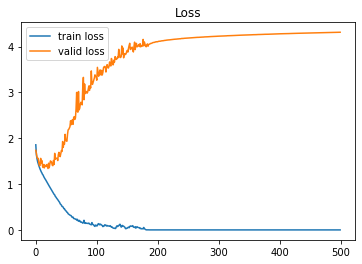

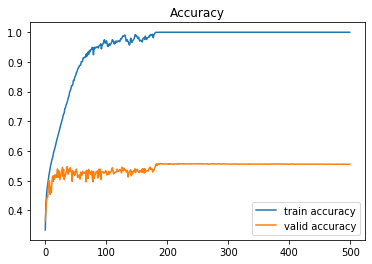

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()